In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanmap as jpm

In [2]:
data_folder = '../data'

akb = pd.read_csv(os.path.join(data_folder, 'akb.csv'))
ske = pd.read_csv(os.path.join(data_folder, 'ske.csv'))
nmb = pd.read_csv(os.path.join(data_folder, 'nmb.csv'))
hkt = pd.read_csv(os.path.join(data_folder, 'hkt.csv'))
ngt = pd.read_csv(os.path.join(data_folder, 'ngt.csv'))
stu = pd.read_csv(os.path.join(data_folder, 'stu.csv'))
akbg = pd.read_csv(os.path.join(data_folder, 'akbg.csv'))

all_data = {'AKB': akb, 'SKE': ske, 'NMB': nmb, 'HKT': hkt, 'NGT': ngt, 'STU': stu, 'AKBG': akbg}

# 身長

In [3]:
heights = {}
for key in all_data.keys():
    heights[key] = [all_data[key]['height'].mean(), all_data[key]['height'].std()]

print('# 身長===========================')
print('     | 平均         | 標準偏差')
print('---------------------------------')
for key in heights.keys():
    if key == 'AKBG':
        print('全体', '|', '{:.2f}cm'.format(np.round(heights[key][0], decimals=2)),
              '    | {:.2f}'.format(np.round(heights[key][1], decimals=2)))
    else:
        print(key, ' |', '{:.2f}cm'.format(np.round(heights[key][0], decimals=2)),
              '    | {:.2f}'.format(np.round(heights[key][1], decimals=2)))

print('---------------------------------')

# 身長===========================
     | 平均         | 標準偏差
---------------------------------
AKB  | 157.05cm     | 4.66
SKE  | 157.77cm     | 4.73
NMB  | 158.36cm     | 4.72
HKT  | 156.79cm     | 6.03
NGT  | 158.06cm     | 3.48
STU  | 156.35cm     | 5.10
全体 | 157.40cm     | 4.90
---------------------------------


# 血液型

In [4]:
blood_type = {}
for key in all_data.keys():
    blood_type[key] = {'A型': len(all_data[key][all_data[key]['blood_type'] == 'A型']),
                       'B型': len(all_data[key][all_data[key]['blood_type'] == 'B型']),
                       'O型': len(all_data[key][all_data[key]['blood_type'] == 'O型']),
                       'AB型': len(all_data[key][all_data[key]['blood_type'] == 'AB型']),
                       '不明': len(all_data[key][all_data[key]['blood_type'] == '不明'])}

print('')
print('# 血液型 ===================================================')
print('     | A型         | B型         | O型         | AB型        ')
print('------------------------------------------------------------')
for key in blood_type.keys():
    if key == 'AKBG':
        print('全体', '|',
              '{:.2f}%'.format(np.round(blood_type[key]['A型']
                                        / (len(all_data[key]) - blood_type[key]['不明']) * 100, decimals=2)),
              '     | {:.2f}%'.format(np.round(blood_type[key]['B型']
                                               / (len(all_data[key]) - blood_type[key]['不明']) * 100, decimals=2)),
              '     | {:.2f}%'.format(np.round(blood_type[key]['O型']
                                               / (len(all_data[key]) - blood_type[key]['不明']) * 100, decimals=2)),
              '     | {:.2f}%'.format(np.round(blood_type[key]['AB型']
                                               / (len(all_data[key]) - blood_type[key]['不明']) * 100, decimals=2)))
    else:
        print(key, ' |',
              '{:.2f}%'.format(np.round(blood_type[key]['A型']
                                        / (len(all_data[key]) - blood_type[key]['不明']) * 100, decimals=2)),
              '     | {:.2f}%'.format(np.round(blood_type[key]['B型']
                                               / (len(all_data[key]) - blood_type[key]['不明']) * 100, decimals=2)),
              '     | {:.2f}%'.format(np.round(blood_type[key]['O型']
                                               / (len(all_data[key]) - blood_type[key]['不明']) * 100, decimals=2)),
              '     | {:.2f}%'.format(np.round(blood_type[key]['AB型']
                                               / (len(all_data[key]) - blood_type[key]['不明']) * 100, decimals=2)))
print('------------------------------------------------------------')



# 血液型 ===================================================
     | A型         | B型         | O型         | AB型        
------------------------------------------------------------
AKB  | 32.18%      | 24.14%      | 36.78%      | 6.90%
SKE  | 37.70%      | 21.31%      | 36.07%      | 4.92%
NMB  | 41.07%      | 28.57%      | 26.79%      | 3.57%
HKT  | 34.88%      | 27.91%      | 25.58%      | 11.63%
NGT  | 47.06%      | 14.71%      | 26.47%      | 11.76%
STU  | 43.33%      | 13.33%      | 36.67%      | 6.67%
全体 | 37.94%      | 22.83%      | 32.15%      | 7.07%
------------------------------------------------------------


# 誕生日

In [5]:
def calc_age(birthday):
    today = int(pd.to_datetime('today').strftime('%Y%m%d'))
    birthday = int(birthday)
    return int((today - birthday) / 10000)


for key in all_data.keys():
    all_data[key]['age'] = all_data[key]['birthday'].apply(lambda date: calc_age(date))

print('# 誕生日===========================================================================================')
print('     | 最年長                                     | 最年少')
print('---------------------------------------------------------------------------------------------------')
for key in all_data.keys():
    if key == 'AKBG':
        print_str = '全体' + ' | '
    else:
        print_str = key + '  | '

    print_str = print_str \
                + all_data[key][all_data[key]['birthday'] == all_data[key]['birthday'].min()]['full_name'].values[0]

    if len(all_data[key][all_data[key]['birthday'] == all_data[key]['birthday'].min()]['full_name'].values[0]) == 4:
        print_str = print_str + '  '
    elif len(all_data[key][all_data[key]['birthday'] == all_data[key]['birthday'].min()]['full_name'].values[0]) == 3:
        print_str = print_str + '    '

    print_str = print_str + 'さん (' \
                + str(all_data[key][all_data[key]['birthday'] == all_data[key]['birthday'].min()]['age'].values[0]) \
                + '歳' \
                + '| ' + str(all_data[key]['birthday'].min())[:4] + '年' \
                + str(all_data[key]['birthday'].min())[4:6] + '月' \
                + str(all_data[key]['birthday'].min())[6:] + '日生まれ' + ')'
    print_str = print_str + ' | ' \
                + all_data[key][all_data[key]['birthday'] == all_data[key]['birthday'].max()]['full_name'].values[0] \
                + 'さん '

    if len(all_data[key][all_data[key]['birthday'] == all_data[key]['birthday'].max()]['full_name'].values[0]) == 4:
        print_str = print_str + '  '
    elif len(all_data[key][all_data[key]['birthday'] == all_data[key]['birthday'].max()]['full_name'].values[0]) == 3:
        print_str = print_str + '    '

    print_str = print_str \
                + '(' \
                + str(all_data[key][all_data[key]['birthday'] == all_data[key]['birthday'].max()]['age'].values[0]) \
                + '歳' + '| ' + str(all_data[key]['birthday'].max())[:4] + '年' \
                + str(all_data[key]['birthday'].max())[4:6] + '月' \
                + str(all_data[key]['birthday'].max())[6:] + '日生まれ' + ')'

    print(print_str)

print('---------------------------------------------------------------------------------------------------')


# 誕生日===========================================================================================
     | 最年長                                     | 最年少
---------------------------------------------------------------------------------------------------
AKB  | 柏木由紀  さん (28歳| 1991年07月15日生まれ) | 御供茉白さん   (13歳| 2005年11月25日生まれ)
SKE  | 須田亜香里さん (27歳| 1991年10月31日生まれ) | 平野百菜さん   (12歳| 2006年09月05日生まれ)
NMB  | 磯佳奈江  さん (25歳| 1993年08月09日生まれ) | 岡本怜奈さん   (13歳| 2005年12月22日生まれ)
HKT  | 坂口理子  さん (24歳| 1994年07月26日生まれ) | 工藤陽香さん   (13歳| 2006年04月21日生まれ)
NGT  | 西潟茉莉奈さん (23歳| 1995年10月16日生まれ) | 古舘葵さん     (14歳| 2004年08月10日生まれ)
STU  | 田中皓子  さん (23歳| 1996年06月16日生まれ) | 森下舞羽さん   (14歳| 2004年10月04日生まれ)
全体 | 柏木由紀  さん (28歳| 1991年07月15日生まれ) | 平野百菜さん   (12歳| 2006年09月05日生まれ)
---------------------------------------------------------------------------------------------------


# 年齢

In [6]:
ages = {}
for key in all_data.keys():
    ages[key] = [all_data[key]['age'].mean(), all_data[key]['age'].std()]

print('# 年齢===========================')
print('     | 平均        | 標準偏差')
print('---------------------------------')
for key in ages.keys():
    if key == 'AKBG':
        print('全体', '|', '{:.2f}歳'.format(np.round(ages[key][0], decimals=2)),
              '    | {:.2f}'.format(np.round(ages[key][1], decimals=2)))
    else:
        print(key, ' |', '{:.2f}歳'.format(np.round(ages[key][0], decimals=2)),
              '    | {:.2f}'.format(np.round(ages[key][1], decimals=2)))

print('---------------------------------')


# 年齢===========================
     | 平均        | 標準偏差
---------------------------------
AKB  | 18.92歳     | 3.15
SKE  | 18.81歳     | 3.43
NMB  | 18.98歳     | 2.97
HKT  | 18.52歳     | 2.52
NGT  | 18.24歳     | 2.22
STU  | 18.27歳     | 2.55
全体 | 18.72歳     | 2.94
---------------------------------


# 出身地

In [7]:
prefectures = {}
for key in all_data:
    tmp_dict = {}
    for prefecture in jpm.pref_names:
        tmp_dict[prefecture] = len(all_data[key][all_data[key]['prefecture'] == prefecture])

    prefectures[key] = tmp_dict

color_list = ['red', 'deeppink', 'orangered', 'gold', 'yellow', 'greenyellow',
              'limegreen', 'darkcyan', 'blue', 'midnightblue']

prefecture_colors = {}
for key in prefectures.keys():
    prefecture_color = {}
    for prefecture in prefectures[key]:
        if prefecture is not '_':
            if prefectures[key][prefecture] > max(prefectures[key].values()) * 0.9:
                prefecture_color[prefecture] = color_list[0]
            elif prefectures[key][prefecture] > max(prefectures[key].values()) * 0.8:
                prefecture_color[prefecture] = color_list[1]
            elif prefectures[key][prefecture] > max(prefectures[key].values()) * 0.7:
                prefecture_color[prefecture] = color_list[2]
            elif prefectures[key][prefecture] > max(prefectures[key].values()) * 0.6:
                prefecture_color[prefecture] = color_list[3]
            elif prefectures[key][prefecture] > max(prefectures[key].values()) * 0.5:
                prefecture_color[prefecture] = color_list[4]
            elif prefectures[key][prefecture] > max(prefectures[key].values()) * 0.4:
                prefecture_color[prefecture] = color_list[5]
            elif prefectures[key][prefecture] > max(prefectures[key].values()) * 0.3:
                prefecture_color[prefecture] = color_list[6]
            elif prefectures[key][prefecture] > max(prefectures[key].values()) * 0.2:
                prefecture_color[prefecture] = color_list[7]
            elif prefectures[key][prefecture] > max(prefectures[key].values()) * 0.1:
                prefecture_color[prefecture] = color_list[8]
            elif prefectures[key][prefecture] >= 1:
                prefecture_color[prefecture] = color_list[9]

    prefecture_colors[key] = prefecture_color


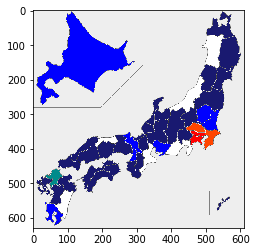

In [8]:
plt.imshow(jpm.picture(prefecture_colors['AKB']))

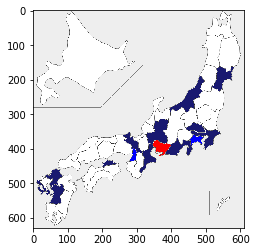

In [9]:
plt.imshow(jpm.picture(prefecture_colors['SKE']))

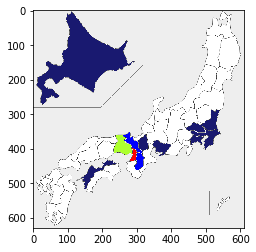

In [10]:
plt.imshow(jpm.picture(prefecture_colors['NMB']))

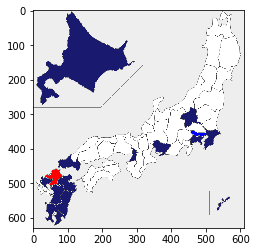

In [11]:
plt.imshow(jpm.picture(prefecture_colors['HKT']))

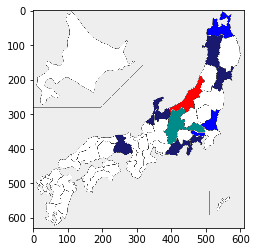

In [12]:
plt.imshow(jpm.picture(prefecture_colors['NGT']))

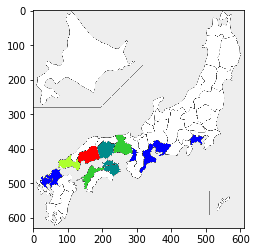

In [13]:
plt.imshow(jpm.picture(prefecture_colors['STU']))

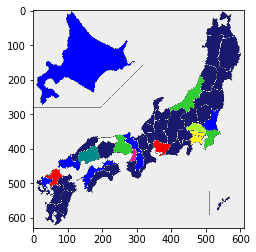

In [15]:
plt.imshow(jpm.picture(prefecture_colors['AKBG']))